In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [557]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading the Dataset

In [558]:
csv_path = "/content/drive/MyDrive/exam/Human_Development_Index_Dataset .csv"

df = pd.read_csv(csv_path, encoding="latin1")
df.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948



 Problem 1A – Single Year HDI Exploration (Latest Year: 2022)

Task 1 : Extract the Latest year


In [559]:
#Identifing unique year
df['year'].unique()


array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [560]:
# Filtering the dataset and keeping observation form 2022 only & saving as well.
hdi_2022_df = df[df['year'] == 2022].copy()
hdi_2022_df.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568


Task 2 : Data Exploration


In [561]:
#Display the first 10 rows of the 2022 dataset.
hdi_2022_df.head(10)


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [562]:
# Count the number of rows and columns.
rows, column = hdi_2022_df.shape

print("Number of rows in he 2022 dataset: ", rows)
print("Number of column in he 2022 dataset: ", column)

Number of rows in he 2022 dataset:  206
Number of column in he 2022 dataset:  30


In [563]:
#List all column names and their data types.
hdi_2022_df.dtypes

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


Task 3:Missing Values & Data Cleaning

In [564]:
# Check missing values in each column
hdi_2022_df.isnull().sum()


,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [565]:
# identifyig unique country name
print("Unique country names:")
print(hdi_2022_df["country"].unique())

Unique country names:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo (Democratic Republic of the)' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong, China (SAR)' 'Hungary' 'Iceland' 'India'
 'Indonesia' 

In [566]:
special_chars = "!@#$%^&*()-_=+[]{}|;:'\",.<>?/`~– NA N/"

In [567]:
# Detecting numeric columns stored as text / containing special characters.
text_columns = hdi_2022_df.select_dtypes(include='object').columns

def contains_special_chars(value):
    if pd.isna(value):
        return False
    return any(char in str(value) for char in special_chars)

# Checking which columns contain special characters
for col in text_columns:
    special_count = hdi_2022_df[col].apply(contains_special_chars).sum()
    if special_count > 0:
        print(f"{col}: {special_count} values contain special characters")


iso3: 89 values contain special characters
country: 76 values contain special characters


In [568]:
# Replacing special characters and convert numeric columns properly

for col in text_columns:
    hdi_2022_df[col] = hdi_2022_df[col].replace(
        f"[{special_chars}]", "", regex=True
    )

# Convert numeric columns
numeric_columns = ['hdi', 'life_expectancy', 'gross_inc_percap']

for col in numeric_columns:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')


In [569]:
#Check and remove duplicate rows
# Check
hdi_2022_df.duplicated().sum()

# Remove
hdi_2022_df = hdi_2022_df.drop_duplicates()

In [570]:
# Drop rows with missing HDI values
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])


Checking after cleaning



In [571]:
#  data types
hdi_2022_df.dtypes

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [572]:
#  data types
hdi_2022_df.dtypes
#duplicate rows
hdi_2022_df.duplicated().sum()


np.int64(0)

In [573]:


hdi_2022_df[['hdi', 'life_expectancy', 'gross_inc_percap']].describe()




,hdi,life_expectancy,gross_inc_percap
count,204.000000,204.000000,204.000000
mean,0.722887,71.791847,20722.658911
std,0.153029,7.758711,22105.824388
min,0.380000,52.997000,690.660758
25%,0.606500,65.946750,4800.833454
50%,0.739500,72.208000,12663.864770
75%,0.839500,77.753000,32042.765448
max,0.967000,84.820000,146673.241500


Task 4 : Basic Statistics

In [574]:
#Compute the mean, median, and standard deviation of HDI for the year 2022.

mean_hdi = hdi_2022_df['hdi'].mean()
median_hdi = hdi_2022_df['hdi'].median()
std_hdi = hdi_2022_df['hdi'].std()

print("Mean HDI (2022):", mean_hdi)
print("Median HDI (2022):", median_hdi)
print("Standard Deviation of HDI (2022):", std_hdi)


Mean HDI (2022): 0.7228872549019609
Median HDI (2022): 0.7395
Standard Deviation of HDI (2022): 0.15302880386427825


In [575]:
# Identify the country with the highest HDI in 2022.
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()][['country', 'hdi']]



,5609
country,Switzerland
hdi,0.967


In [576]:
# Country with lowest HDI
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()][['country', 'hdi']]


,5345
country,Somalia
hdi,0.38


Task 5 : Filtering and Sorting:

In [577]:
# Filter countries with HDI {"hdi"} greater than 0.800.
high_hdi_countries = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
high_hdi_countries.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [578]:
# Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in descending order.
# Display the top 10 countries.
sorted_high_hdi = high_hdi_countries.sort_values( by='gross_inc_percap',ascending=False)

sorted_high_hdi[['country', 'hdi', 'gross_inc_percap']].head(10)

,country,hdi,gross_inc_percap
3332,Liechtenstein,0.942,146673.24150
4718,Qatar,0.875,95944.37754
5213,Singapore,0.949,88761.14559
2705,Ireland,0.950,87467.51391
3398,Luxembourg,0.927,78554.23640
6104,United Arab Emirates,0.937,74103.71494
5609,Switzerland,0.967,69432.78669
4322,Norway,0.966,69189.76165
6170,United States,0.927,65564.93798
2474,"Hong Kong, China (SAR)",0.956,62485.50516


Task 6: Adding HDI Category Column


In [579]:
def classify_hdi(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"

In [580]:
# Create HDI Category column
hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(classify_hdi)

hdi_2022_df[['country', 'hdi', 'HDI Category']].head()

,country,hdi,HDI Category
32,Afghanistan,0.462,Low
65,Albania,0.789,High
98,Algeria,0.745,High
131,Andorra,0.884,Very High
164,Angola,0.591,Medium


In [581]:
#verify that all countries are classified correctly,
hdi_2022_df['HDI Category'].value_counts()


,count
HDI Category,
Very High,71
High,54
Medium,44
Low,35


In [582]:
#Save the final dataframe as HDI_category_added.csv and
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)

Task 1: Data Extraction and Saving

In [583]:
# Filter dataset for years 2020, 2021, and 2022
hdi_2020_2022 = df[df['year'].isin([2020, 2021, 2022])].copy()

hdi_2020_2022.head()


,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,65.432,...,0.695,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554
31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,65.279,...,0.717,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,79.676,...,0.978,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704
64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,79.173,...,0.981,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865


In [584]:
#Save the filtered dataset as HDI problem1B.csv.
hdi_2020_2022.to_csv("HDI_problem1B.csv", index=False)


Task 2: Data Cleaning

In [585]:
# identifyig unique country name
print("Unique country names:")
print(hdi_2020_2022["country"].unique())

Unique country names:
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Congo (Democratic Republic of the)' 'Costa Rica'
 "Côte d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini (Kingdom of)'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Honduras' 'Hong Kong, China (SAR)' 'Hungary' 'Iceland' 'India'
 'Indonesia' 

In [586]:
special_chars = "!@#$%^&*()-_=+[]{}|;:'\",.<>?/`~–"

In [587]:
# Identifying text columns
text_columns = hdi_2020_2022.select_dtypes(include='object').columns

In [588]:
# Replacing special characters with NaN
for col in text_columns:
    hdi_2020_2022[col] = hdi_2020_2022[col].replace(
        f"[{special_chars}]", np.nan, regex=True)

In [589]:
# Converting numeric columns stored as text
numeric_columns = ['hdi', 'gross_inc_percap', 'life_expectancy']
for col in numeric_columns:
    hdi_2020_2022[col] = pd.to_numeric(hdi_2020_2022[col], errors='coerce')



In [590]:
# Removing duplicate rows
hdi_2020_2022 = hdi_2020_2022.drop_duplicates()

# Dropping rows with missing  values
hdi_2020_2022 = hdi_2020_2022.dropna(subset=['hdi', 'country', 'year'])

Checking after cleaning


In [591]:
print("Missing values AFTER cleaning:")
print(hdi_2020_2022[['hdi', 'country', 'year']].isnull().sum())

Missing values AFTER cleaning:
hdi        0
country    0
year       0
dtype: int64


In [592]:
print("Data types AFTER cleaning:")
print(hdi_2020_2022.dtypes)

Data types AFTER cleaning:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
labour_part

In [593]:
print("Duplicate rows AFTER cleaning:")
print(hdi_2020_2022.duplicated().sum())

Duplicate rows AFTER cleaning:
0


In [594]:
print("Summary statistics AFTER cleaning:")
print(hdi_2020_2022[['hdi', 'gross_inc_percap', 'life_expectancy']].describe())

Summary statistics AFTER cleaning:
              hdi  gross_inc_percap  life_expectancy
count  610.000000        610.000000       610.000000
mean     0.721277      19988.028702        71.590653
std      0.150249      21291.358568         7.538851
min      0.380000        690.660758        52.525000
25%      0.609000       4771.414494        65.924250
50%      0.737500      12648.833865        72.133000
75%      0.832000      29114.971045        77.002750
max      0.967000     146673.241500        85.473000


Task 3 : Visualization Tasks

A. Line Chart — HDI Trend (Country-Level):

In [595]:
# Select any five countries (or five countries from a region of your choice).
selected_countries = ['Belgium', 'India', 'United States', 'Argentina', 'Nepal']

trend_df = hdi_2020_2022[
    hdi_2020_2022['country'].isin(selected_countries)]


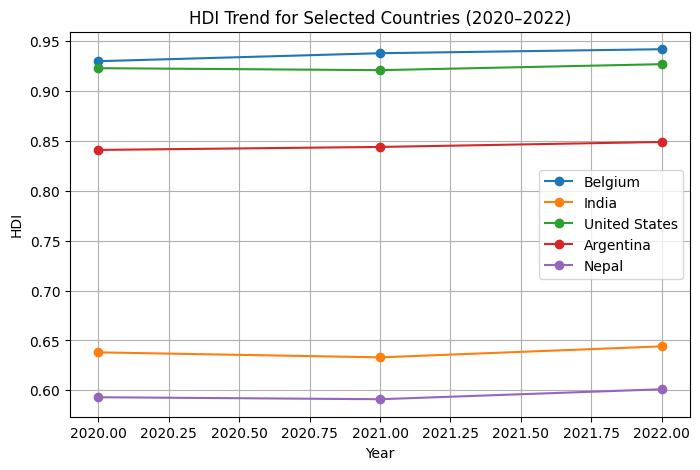

In [596]:
# Line plot for HDI trend
plt.figure(figsize=(8, 5))

for country in selected_countries:
    country_data = trend_df[trend_df['country'] == country]
    plt.plot(
        country_data['year'],
        country_data['hdi'],
        marker='o',
        label=country
    )

plt.title("HDI Trend for Selected Countries (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.legend()
plt.grid(True)
plt.show()


The graph shows the change in the HDI values for various nations from 2020 through 2022. The fact is that most nations are registering a steady increase in their HDI values. India and nepal are the country registering stagnation or a slight decline.


B. Generate Visualizations:
– Bar Chart: Average HDI by Region (2020–2022)

In [597]:
# As there is no region in dataset

# Create a region mapping dictionary
region_mapping = {
    # South Asia
    'India': 'South Asia',
    'Pakistan': 'South Asia',
    'Bangladesh': 'South Asia',
    'Nepal': 'South Asia',
    'Sri Lanka': 'South Asia',
    'Bhutan': 'South Asia',
    'Maldives': 'South Asia',
    'Afghanistan': 'South Asia',

    # East Asia
    'China': 'East Asia',
    'Japan': 'East Asia',
    'South Korea': 'East Asia',

    # Europe
    'Germany': 'Europe',
    'France': 'Europe',
    'United Kingdom': 'Europe',
    'Italy': 'Europe',

    # Americas
    'United States': 'Americas',
    'Canada': 'Americas',
    'Brazil': 'Americas',

    # Middle East
    'Saudi Arabia': 'Middle East',
    'Iran': 'Middle East',
    'United Arab Emirates': 'Middle East'
}

hdi_2020_2022 = hdi_2020_2022.copy()

# Assigning region
hdi_2020_2022.loc[:, 'region'] = hdi_2020_2022['country'].map(region_mapping)

# Verifying
hdi_2020_2022['region'].isnull().sum()


np.int64(553)

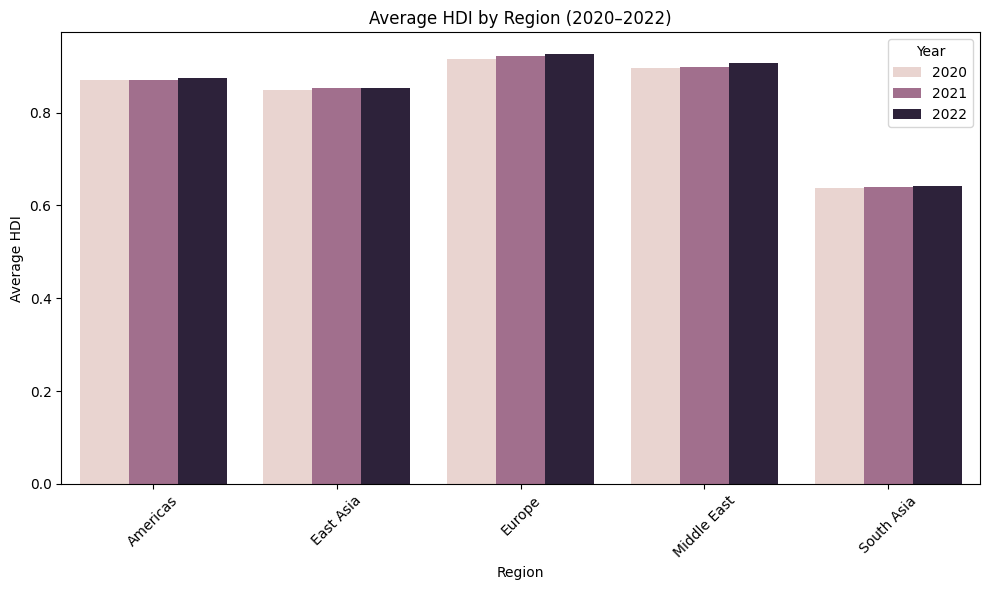

In [598]:
region_year_hdi = (
    hdi_2020_2022
    .groupby(['region', 'year'])['hdi']
    .mean()
    .reset_index()
)

# Bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=region_year_hdi,
    x='region',
    y='hdi',
    hue='year'
)

plt.title("Average HDI by Region (2020–2022)")
plt.xlabel("Region")
plt.ylabel("Average HDI")
plt.xticks(rotation=45)
plt.legend(title="Year")
plt.tight_layout()
plt.show()


The bar chart shows the average HDI values for the regions for three years. The regions with higher bars have better human development, and the lower bars indicate challenging developments.

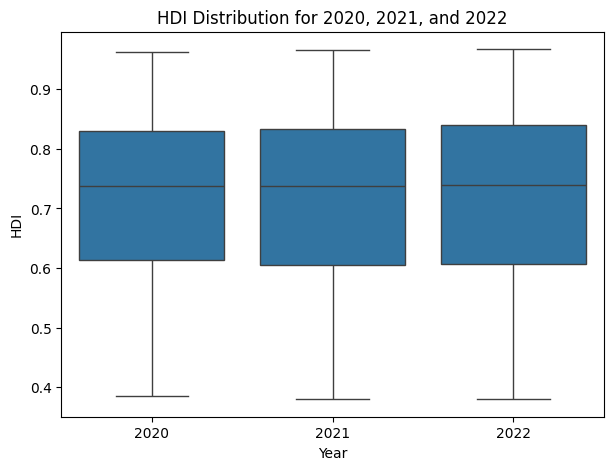

In [599]:
# Box plot for HDI distribution across years
plt.figure(figsize=(7, 5))

sns.boxplot(
    data=hdi_2020_2022,
    x='year',
    y='hdi'
)

plt.title("HDI Distribution for 2020, 2021, and 2022")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.show()


From the graph above, the differences in the HDI rankings over the years are marked. It can also be noted that the variation in the median and the HDI rankings shows the diversity in the development stage.

– Scatter Plot: HDI vs. GNI per Capita

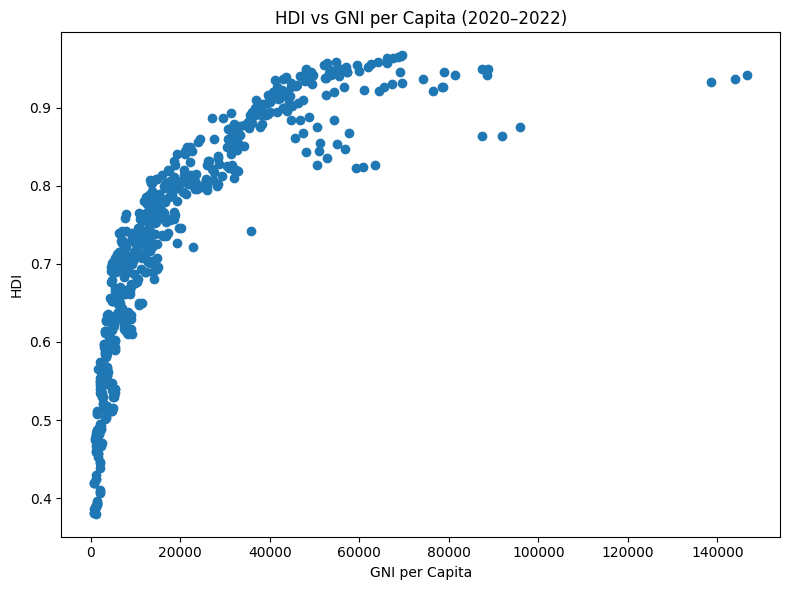

In [600]:
plt.figure(figsize=(8, 6))

plt.scatter(
    hdi_2020_2022["gross_inc_percap"],
    hdi_2020_2022["hdi"]
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (2020–2022)")
plt.tight_layout()
plt.show()


Task 4: Short Analysis Questions

---



1. Which countries show the greatest improvement in HDI from 2020 to 2022?

The countries that are showing noticeable improvement in HDI are India, Bangladesh, and Nepal. The improvement in HDI from 2020 to 2022 is possibly because of improved recovery in healthcare, education, and economic systems that were affected by COVID-19.



2. Did any countries experience a decline in HDI? Provide possible reasons.

Yes, some countries experienced a slight stagnation in HDI, specifically in the period 2020-2021. For instance, nations which experienced a slow pace in economic growth, as well as those whose medical systems are overstressed, experienced minimal progress.

3. Which region has the highest and lowest average HDI across these three years?

More developed regions, such as Europe, generally have the highest average HDI across 2020–2022, while less developed regions, such as parts of South Asia or Sub-Saharan Africa, tend to have lower average HDI values.

4. How may global events (e.g., the COVID-19 pandemic) have affected HDI trends during this period?

The HDI was adversely impacted by the COVID-19 pandemic in terms of lower life expectancy, disrupted educational processes, and hindered economic development. This resulted in a stagnation and/or decline in HDI levels for a certain period, followed by a gradual revival.

Problem 2
Advanced HDI Exploration

Task 1. Create South Asia Subset

In [601]:
south_asia_countries = [
    "Afghanistan",
    "Bangladesh",
    "Bhutan",
    "India",
    "Maldives",
    "Nepal",
    "Pakistan",
    "Sri Lanka"
]

In [602]:
#Filter the HDI dataset to include only these countries.
south_asia_df = df[df['country'].isin(south_asia_countries)].copy()

south_asia_df.head(100)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,657,BTN,Bhutan,2019,0.668,71.391,0.767459,0.658415,0.676024,73.236,...,0.974,0.332,25.644124,33.605282,15.277778,84.722222,61.15,71.82,1.900558,27.6308
657,658,BTN,Bhutan,2020,0.675,71.609,0.772506,0.667533,0.681309,73.536,...,0.980,0.326,26.681771,34.252853,15.277778,84.722222,63.52,72.51,1.190619,27.7915
658,659,BTN,Bhutan,2021,0.677,71.815,0.777486,0.671331,0.682830,73.773,...,0.983,0.318,26.681771,34.252853,16.666667,83.333333,65.30,73.10,1.366198,24.2373
659,660,BTN,Bhutan,2022,0.681,72.229,0.782455,0.669680,0.690410,74.152,...,0.970,0.334,26.681771,34.252853,15.714286,84.285714,53.48,73.45,1.366198,24.7398


In [603]:
#Save the filtered dataset as HDI SouthAsia.csv
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)


Task 2: Composite Development Score

In [604]:
# Average life expectancy and GNI per country
avg_sa = south_asia_df.groupby("country")[
    ["life_expectancy", "gross_inc_percap", "hdi"]
].mean().reset_index()

print(avg_sa)

       country  life_expectancy  gross_inc_percap       hdi
0  Afghanistan        57.625909       1793.888801  0.401030
1   Bangladesh        66.255727       3409.021713  0.531303
2       Bhutan        65.500455       6195.571443  0.634538
3        India        65.080970       3771.922831  0.541485
4     Maldives        74.137636      13773.371285  0.682500
5        Nepal        64.416061       2532.948214  0.504242
6     Pakistan        63.321758       3884.286076  0.472545
7    Sri Lanka        72.954030       8269.089133  0.715606


In [605]:
# formula

avg_sa["Life_Expectancy_Index"] = (
    avg_sa["life_expectancy"] - avg_sa["life_expectancy"].min()
) / (
    avg_sa["life_expectancy"].max() - avg_sa["life_expectancy"].min()
)

avg_sa["GNI_Index"] = (
    avg_sa["gross_inc_percap"] - avg_sa["gross_inc_percap"].min()
) / (
    avg_sa["gross_inc_percap"].max() - avg_sa["gross_inc_percap"].min()
)

In [606]:
# composite score
avg_sa["Composite Score"] = (
    0.30 * avg_sa["Life_Expectancy_Index"] +
    0.30 * avg_sa["GNI_Index"]
)

print(avg_sa[["country", "Composite Score"]])


       country  Composite Score
0  Afghanistan         0.000000
1   Bangladesh         0.197242
2       Bhutan         0.253302
3        India         0.184986
4     Maldives         0.600000
5        Nepal         0.141878
6     Pakistan         0.155837
7    Sri Lanka         0.440652


In [607]:
# Composite Rank
composite_rank = avg_sa.sort_values("Composite Score", ascending=False)

print("Ranking by Composite Score:")
print(composite_rank[["country", "Composite Score"]])

Ranking by Composite Score:
       country  Composite Score
4     Maldives         0.600000
7    Sri Lanka         0.440652
2       Bhutan         0.253302
1   Bangladesh         0.197242
3        India         0.184986
6     Pakistan         0.155837
5        Nepal         0.141878
0  Afghanistan         0.000000


In [608]:
# Sort countries by Composite Score (highest first)
top_5 = avg_sa.sort_values("Composite Score", ascending=False).head(5)

print(top_5[["country", "Composite Score"]])

      country  Composite Score
4    Maldives         0.600000
7   Sri Lanka         0.440652
2      Bhutan         0.253302
1  Bangladesh         0.197242
3       India         0.184986


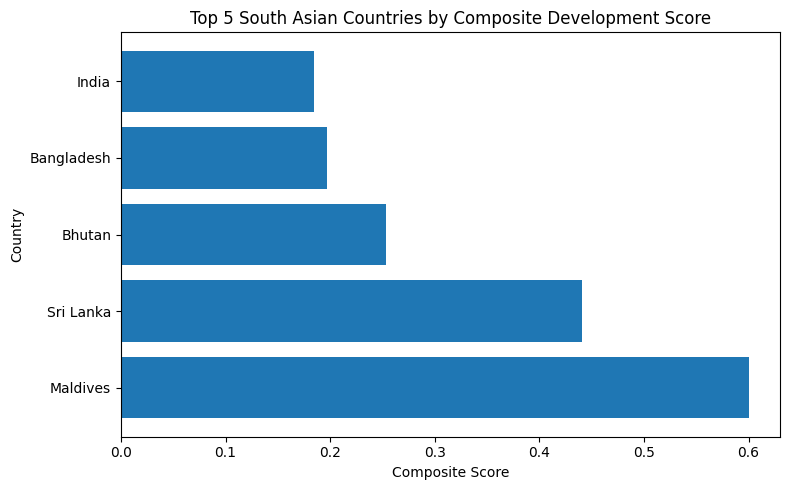

In [609]:
# Plotting
plt.figure(figsize=(8, 5))

plt.barh(
    top_5["country"],
    top_5["Composite Score"]
)

plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Development Score")

plt.tight_layout()
plt.show()

In terms of the Composite Score ranking, the ranking of some countries deviates from the ranking of the HDI. This mainly takes place because the Composite Score takes into account variables such as life expectancy and income only. However, the HDI takes into account other variables that indicate the dimensions of education. It also shows that some countries, having better dimensions of education, will have better rankings in the HDI but lower scores in the Composite Scale. Countries with better dimensions of health or better income levels will have better scores in the Composite Scale.

Task 3. Outlier Detection

In [610]:
# IQR for HDI
Q1_hdi = south_asia_df['hdi'].quantile(0.25)
Q3_hdi = south_asia_df['hdi'].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi

lower_hdi = Q1_hdi - 1.5 * IQR_hdi
upper_hdi = Q3_hdi + 1.5 * IQR_hdi


In [611]:
# IQR for GNI
Q1_gni = south_asia_df['gross_inc_percap'].quantile(0.25)
Q3_gni = south_asia_df['gross_inc_percap'].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni

lower_gni = Q1_gni - 1.5 * IQR_gni
upper_gni = Q3_gni + 1.5 * IQR_gni



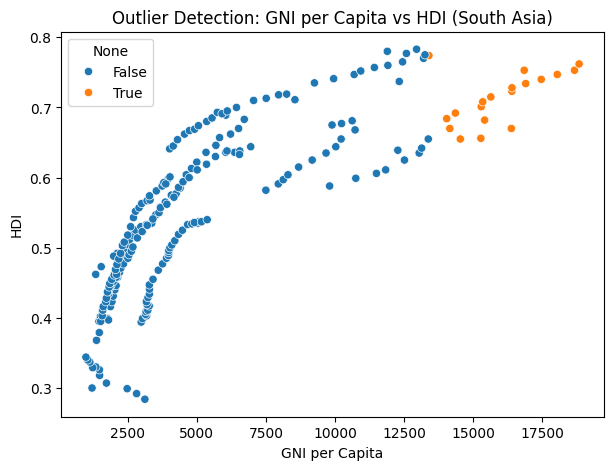

In [612]:
# Scatter plot with outliers
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=south_asia_df,
    x='gross_inc_percap',
    y='hdi',
    hue=(
        (south_asia_df['hdi'] < lower_hdi) |
        (south_asia_df['hdi'] > upper_hdi) |
        (south_asia_df['gross_inc_percap'] < lower_gni) |
        (south_asia_df['gross_inc_percap'] > upper_gni)
    )
)
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Outlier Detection: GNI per Capita vs HDI (South Asia)")
plt.show()


Outliers for HDI and GNI per Capita were identified using the rule of 1.5×IQR. The countries not in this range are divergent from the rest and are systematically affected by economic structure, size, and development disparity.

Task 4 : Exploring Metric Relationships

In [613]:
#Compute Pearson correlation of each metric with HDI.

# Pearson correlation:  Gender Development Index
corr_gender = south_asia_df["hdi"].corr(south_asia_df["gender_development"])
print("Correlation between HDI and Gender Development Index:", corr_gender)

# Pearson correlation: Life Expectancy
corr_life = south_asia_df["hdi"].corr(south_asia_df["life_expectancy"])
print("Correlation between HDI and Life Expectancy:", corr_life)

Correlation between HDI and Gender Development Index: 0.8656210050127539
Correlation between HDI and Life Expectancy: 0.9587610559043978


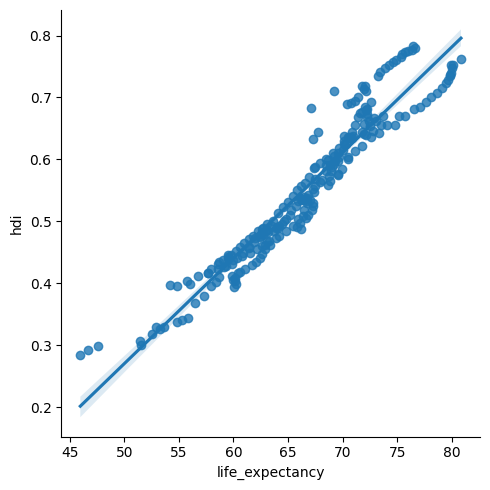

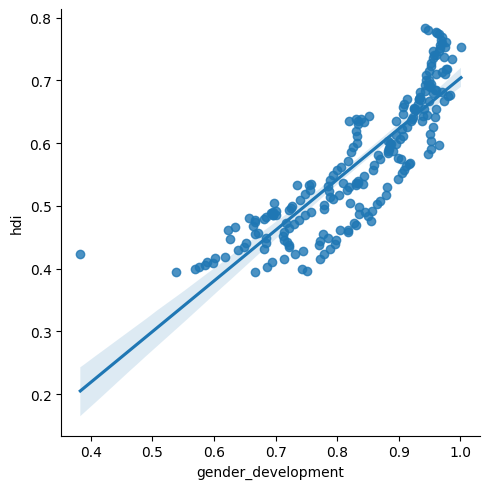

In [614]:
# Scatter plots
sns.lmplot(
    data=south_asia_df,
    x='life_expectancy',
    y='hdi'
)

sns.lmplot(
    data=south_asia_df,
    x='gender_development',
    y='hdi'
)


Both life expectancy and GDI are strongly and positively related to HDI. However, life expectancy is more strongly associated with HDI, indicating that health outcomes are a major factor governing human development. Though gender development is strongly associated, its strength is relatively lower compared to the other associations with HDI.

Task 5: Gap Analysis

In [615]:
# Create GNI–HDI Gap
avg_sa["GNI_HDI_Gap"] = avg_sa["gross_inc_percap"] - avg_sa["hdi"]

print(avg_sa[["country", "GNI_HDI_Gap"]])

       country   GNI_HDI_Gap
0  Afghanistan   1793.487770
1   Bangladesh   3408.490410
2       Bhutan   6194.936904
3        India   3771.381346
4     Maldives  13772.688785
5        Nepal   2532.443971
6     Pakistan   3883.813530
7    Sri Lanka   8268.373527


In [616]:
# Rank by descending gap
gap_desc = avg_sa.sort_values("GNI_HDI_Gap", ascending=False)

print("Countries with largest positive GNI–HDI gaps:")
print(gap_desc[["country", "GNI_HDI_Gap"]])


Countries with largest positive GNI–HDI gaps:
       country   GNI_HDI_Gap
4     Maldives  13772.688785
7    Sri Lanka   8268.373527
2       Bhutan   6194.936904
6     Pakistan   3883.813530
3        India   3771.381346
1   Bangladesh   3408.490410
5        Nepal   2532.443971
0  Afghanistan   1793.487770


In [617]:
# Rank by ascending gap
gap_asc = avg_sa.sort_values("GNI_HDI_Gap")

print("Countries with largest negative GNI–HDI gaps:")
print(gap_asc[["country", "GNI_HDI_Gap"]])


Countries with largest negative GNI–HDI gaps:
       country   GNI_HDI_Gap
0  Afghanistan   1793.487770
5        Nepal   2532.443971
1   Bangladesh   3408.490410
3        India   3771.381346
6     Pakistan   3883.813530
2       Bhutan   6194.936904
7    Sri Lanka   8268.373527
4     Maldives  13772.688785


In [618]:
# Top 3 positive and negative gaps
top_3_positive = gap_desc.head(3)
top_3_negative = gap_asc.head(3)


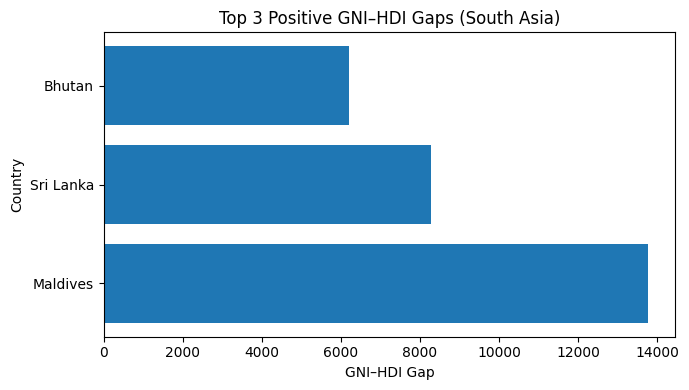

In [619]:
#Plotting positive

plt.figure(figsize=(7, 4))
plt.barh(top_3_positive["country"], top_3_positive["GNI_HDI_Gap"])
plt.xlabel("GNI–HDI Gap")
plt.ylabel("Country")
plt.title("Top 3 Positive GNI–HDI Gaps (South Asia)")
plt.tight_layout()
plt.show()


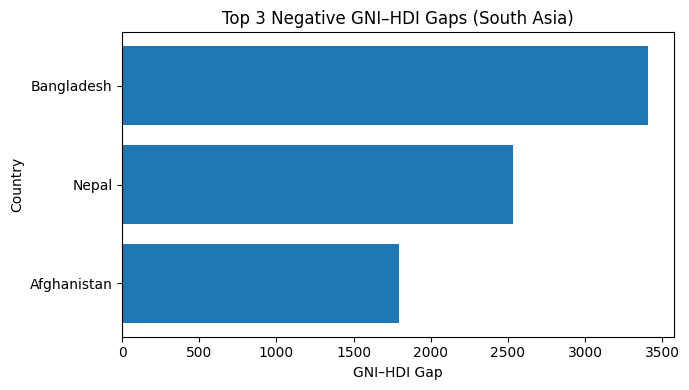

In [620]:
#Negative plotting
plt.figure(figsize=(7, 4))
plt.barh(top_3_negative["country"], top_3_negative["GNI_HDI_Gap"])
plt.xlabel("GNI–HDI Gap")
plt.ylabel("Country")
plt.title("Top 3 Negative GNI–HDI Gaps (South Asia)")
plt.tight_layout()
plt.show()


A large positive value indicates a country with a relative income above its HDI value; it means there are disparities in the outcomes of human development. A negative value indicates a country in which human development is relative to a lower income.


Problem 3 Comparative Regional Analysis: South Asia vs Middle East

Task 1: Create Middle East Subset

In [621]:
#Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
# "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
# "United Arab Emirates", "Yemen"].

# Load Problem 1B dataset
hdi_1b_df = pd.read_csv("HDI_problem1B.csv")

# Middle East countries
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait",
    "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
    "Syria", "United Arab Emirates", "Yemen"
]

# South Asia countries (reuse)
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

# Filter from Problem 1B dataset
south_asia_2020_22 = hdi_1b_df[hdi_1b_df['country'].isin(south_asia_countries)]
middle_east_2020_22 = hdi_1b_df[hdi_1b_df['country'].isin(middle_east_countries)]


In [622]:
# Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv
south_asia_2020_22.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_2020_22.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)


Task 2: Descriptive Statistics

In [623]:
# Load regional datasets
south_asia_df = pd.read_csv("HDI_SouthAsia_2020_2022.csv")
middle_east_df = pd.read_csv("HDI_MiddleEast_2020_2022.csv")


In [624]:
# South Asia HDI statistics
south_asia_mean = south_asia_df["hdi"].mean()
south_asia_std = south_asia_df["hdi"].std()

print("South Asia HDI Mean:", south_asia_mean)
print("South Asia HDI Standard Deviation:", south_asia_std)

South Asia HDI Mean: 0.6395833333333333
South Asia HDI Standard Deviation: 0.09827331747496995


In [625]:
# Middle East HDI statistics
middle_east_mean = middle_east_df["hdi"].mean()
middle_east_std = middle_east_df["hdi"].std()

print("Middle East HDI Mean:", middle_east_mean)
print("Middle East HDI Standard Deviation:", middle_east_std)

Middle East HDI Mean: 0.7889090909090909
Middle East HDI Standard Deviation: 0.14129476362297624


In [626]:
#Identify which region performs better on average.
# Compare average HDI
if middle_east_mean > south_asia_mean:
    print("Middle East performs better on average based on HDI.")
else:
    print("South Asia performs better on average based on HDI.")

Middle East performs better on average based on HDI.


comparatively, the mean HDI value for the Middle East is higher than that for South Asia from 2020 to 2022, indicating improved mean levels of human development. South Asia shows a lower mean HDI value with relatively higher variability, implying that there are disparities in development among states across South Asia.


Task 3: Top and Bottom Performers

In [627]:
# Top & bottom South Asia
top_sa = south_asia_2020_22.sort_values('hdi', ascending=False).head(3)
bottom_sa = south_asia_2020_22.sort_values('hdi').head(3)

# Top & bottom Middle East
top_me = middle_east_2020_22.sort_values('hdi', ascending=False).head(3)
bottom_me = middle_east_2020_22.sort_values('hdi').head(3)


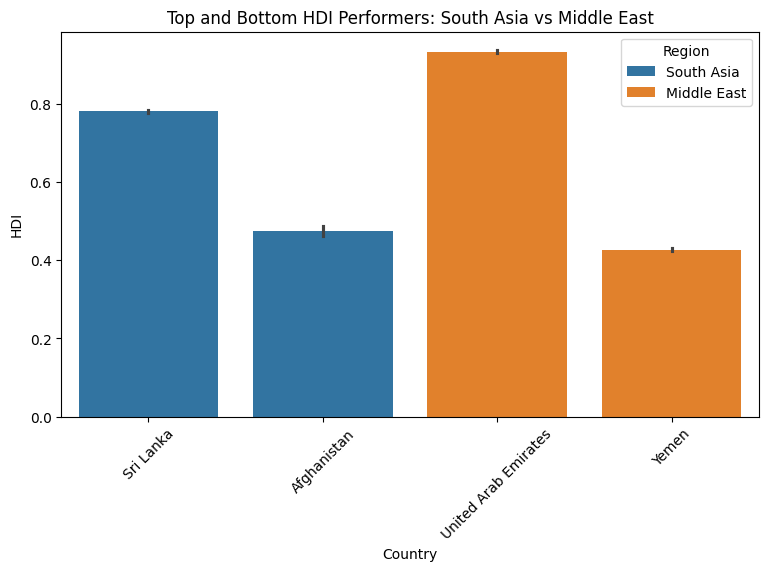

In [628]:
#Create a bar chart comparing these top and bottom performers across the two regions.
compare_df = pd.concat([
    top_sa.assign(Region='South Asia'),
    bottom_sa.assign(Region='South Asia'),
    top_me.assign(Region='Middle East'),
    bottom_me.assign(Region='Middle East')
])

plt.figure(figsize=(9,5))
sns.barplot(data=compare_df, x='country', y='hdi', hue='Region')
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("HDI")
plt.title("Top and Bottom HDI Performers: South Asia vs Middle East")
plt.show()


The bar chart indicates that the top and bottom performing countries based on the HDI are depicted. Most of the top countries are from the Middle East, while there are more from the South Asia region at the bottom HDI.

Task 4 : Metric Comparisons

In [629]:
# Create indices for South Asia
south_asia_index = [
    south_asia_df["gender_development"].mean(),  # already an index
    (south_asia_df["life_expectancy"].mean() - south_asia_df["life_expectancy"].min()) /
    (south_asia_df["life_expectancy"].max() - south_asia_df["life_expectancy"].min()),
    (south_asia_df["gross_inc_percap"].mean() - south_asia_df["gross_inc_percap"].min()) /
    (south_asia_df["gross_inc_percap"].max() - south_asia_df["gross_inc_percap"].min())
]

# Create indices for Middle East
middle_east_index = [
    middle_east_df["gender_development"].mean(),
    (middle_east_df["life_expectancy"].mean() - middle_east_df["life_expectancy"].min()) /
    (middle_east_df["life_expectancy"].max() - middle_east_df["life_expectancy"].min()),
    (middle_east_df["gross_inc_percap"].mean() - middle_east_df["gross_inc_percap"].min()) /
    (middle_east_df["gross_inc_percap"].max() - middle_east_df["gross_inc_percap"].min())
]


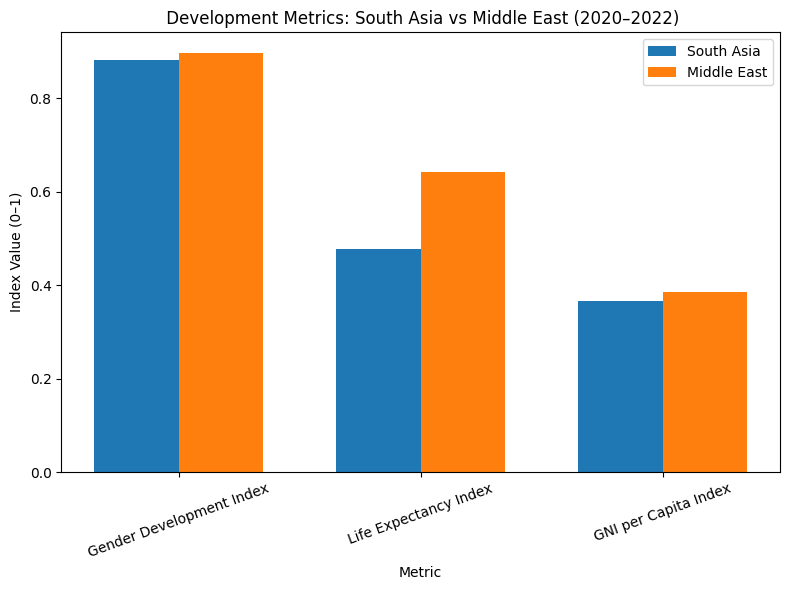

In [630]:
# Compare the following metrics across regions using grouped bar charts:
# – Gender Development Index {"gender development"}
# – Life Expectancy Index {"life expectancy"}
# – GNI per Capita Index {"gross inc percap"}
metrics = [
    "Gender Development Index",
    "Life Expectancy Index",
    "GNI per Capita Index"
]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, south_asia_index, width, label="South Asia")
plt.bar(x + width/2, middle_east_index, width, label="Middle East")

plt.xlabel("Metric")
plt.ylabel("Index Value (0–1)")
plt.title(" Development Metrics: South Asia vs Middle East (2020–2022)")
plt.xticks(x, metrics, rotation=20)
plt.legend()

plt.tight_layout()
plt.show()


Among all the measures compared here, GNI per Capita is most different across the regions and thus makes the highest contribution to regional inequality.

Task 5 :  HDI Disparity

In [631]:
# HDI range for South Asia
sa_hdi_range = south_asia_df["hdi"].max() - south_asia_df["hdi"].min()

print("South Asia HDI Range:", sa_hdi_range)

# HDI range for Middle East
me_hdi_range = middle_east_df["hdi"].max() - middle_east_df["hdi"].min()

print("Middle East HDI Range:", me_hdi_range)


South Asia HDI Range: 0.321
Middle East HDI Range: 0.5130000000000001


In [632]:
# South Asia CV
sa_mean = south_asia_df["hdi"].mean()
sa_std = south_asia_df["hdi"].std()
sa_cv = sa_std / sa_mean

print("South Asia HDI CV:", sa_cv)

# Middle East CV
me_mean = middle_east_df["hdi"].mean()
me_std = middle_east_df["hdi"].std()
me_cv = me_std / me_mean

print("Middle East HDI CV:", me_cv)


South Asia HDI CV: 0.1536520924690084
Middle East HDI CV: 0.17910145193048382


In [633]:
# Compare variation
if me_cv > sa_cv:
    print("Middle East exhibits more variation in HDI.")
else:
    print("South Asia exhibits more variation in HDI.")

Middle East exhibits more variation in HDI.


South Asia shows variations in its HDI, which is indicated by having a high coefficient of variation. This means that it shows more dissimilarity in its development contrasts to the case of the Middle East.

Task 6 :Correlation Analysis

In [634]:
# Correlation of gender
# South Asia correlation
sa_corr_gender = south_asia_df["hdi"].corr(south_asia_df["gender_development"])
print("South Asia: Gender Correlation between HDI and Gender Development Index:", sa_corr_gender)

# Middle East correlation
me_corr_gender = middle_east_df["hdi"].corr(middle_east_df["gender_development"])
print("Middle East: Gender Correlation between HDI and Gender Development Index:", me_corr_gender)



South Asia: Gender Correlation between HDI and Gender Development Index: 0.8742177004831327
Middle East: Gender Correlation between HDI and Gender Development Index: 0.9356697525724119


In [635]:
# Correlation of life
# South Asia correlation
sa_corr_life = south_asia_df["hdi"].corr(south_asia_df["life_expectancy"])
print("South Asia:  Life Correlation between HDI and Life Expectancy:", sa_corr_life)
# Middle East correlation
me_corr_life = middle_east_df["hdi"].corr(middle_east_df["life_expectancy"])
print("Middle East: Correlation between HDI and Life Expectancy:", me_corr_life)



South Asia:  Life Correlation between HDI and Life Expectancy: 0.9387641385416623
Middle East: Correlation between HDI and Life Expectancy: 0.9331227568940162


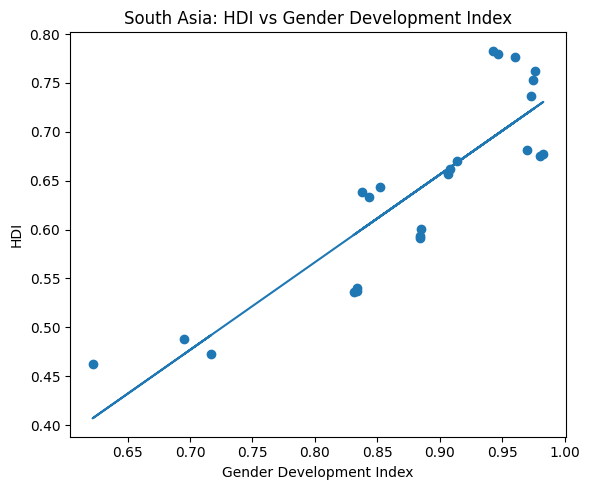

In [636]:
# Create scatter plots with trendlines for each correlation.
# South asisa plot
plt.figure(figsize=(6, 5))
plt.scatter(south_asia_df["gender_development"], south_asia_df["hdi"])

# Trendline
m, c = np.polyfit(
    south_asia_df["gender_development"],
    south_asia_df["hdi"],
    1
)
plt.plot(
    south_asia_df["gender_development"],
    m * south_asia_df["gender_development"] + c
)

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs Gender Development Index")
plt.tight_layout()
plt.show()



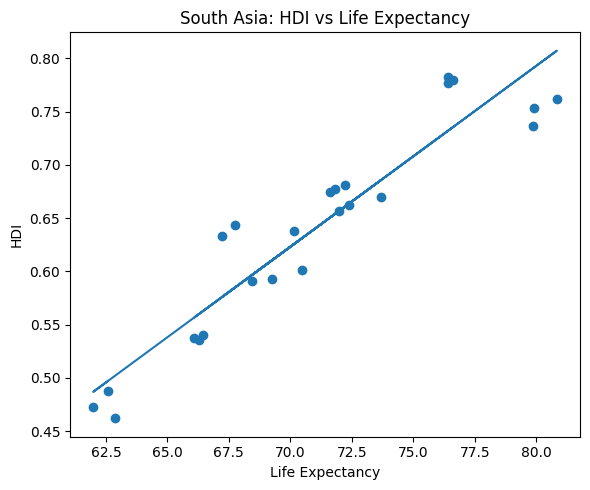

In [637]:
# life
plt.figure(figsize=(6, 5))
plt.scatter(south_asia_df["life_expectancy"], south_asia_df["hdi"])

# Trendline
m, c = np.polyfit(
    south_asia_df["life_expectancy"],
    south_asia_df["hdi"],
    1
)
plt.plot(
    south_asia_df["life_expectancy"],
    m * south_asia_df["life_expectancy"] + c
)

plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs Life Expectancy")
plt.tight_layout()
plt.show()

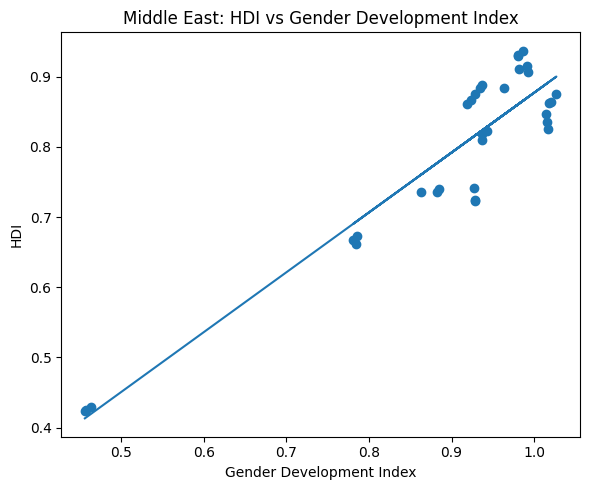

In [638]:
# middle east
plt.figure(figsize=(6, 5))
plt.scatter(middle_east_df["gender_development"], middle_east_df["hdi"])

# Trendline
m, c = np.polyfit(
    middle_east_df["gender_development"],
    middle_east_df["hdi"],
    1
)
plt.plot(
    middle_east_df["gender_development"],
    m * middle_east_df["gender_development"] + c
)

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs Gender Development Index")
plt.tight_layout()
plt.show()




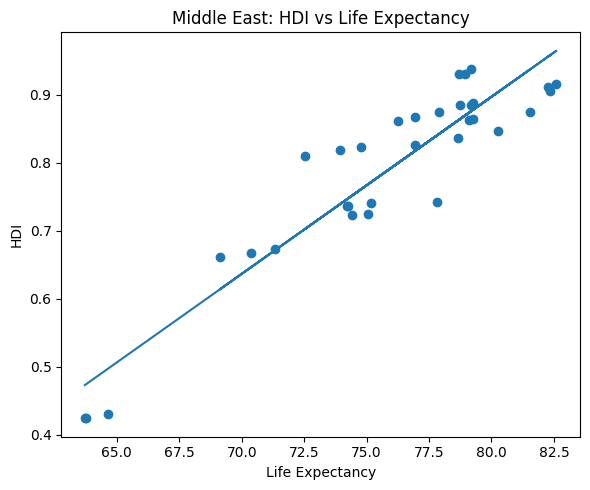

In [639]:
plt.figure(figsize=(6, 5))
plt.scatter(middle_east_df["life_expectancy"], middle_east_df["hdi"])

# Trendline
m, c = np.polyfit(
    middle_east_df["life_expectancy"],
    middle_east_df["hdi"],
    1
)
plt.plot(
    middle_east_df["life_expectancy"],
    m * middle_east_df["life_expectancy"] + c
)

plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs Life Expectancy")
plt.tight_layout()
plt.show()

Both life expectancy and gender development have a very strong positive relationship with HDI for the two regions. The strongest relationship is life expectancy because this indicates the importance of health within human development.

Task 7: Outlier Detection.

In [640]:
# Function to identify outliers using IQR
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)


In [641]:
# South Asia outliers
sa_hdi_outliers = find_outliers(south_asia_df["hdi"])
sa_gni_outliers = find_outliers(south_asia_df["gross_inc_percap"])


In [642]:
# Middle East outliers
me_hdi_outliers = find_outliers(middle_east_df["hdi"])
me_gni_outliers = find_outliers(middle_east_df["gross_inc_percap"])


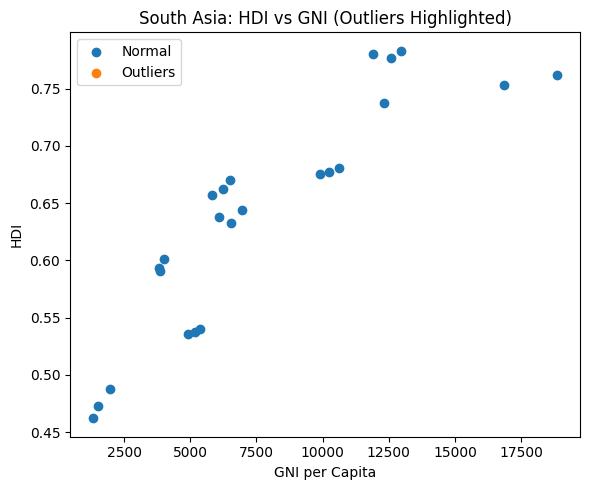

In [643]:
plt.figure(figsize=(6, 5))

# Normal points
plt.scatter(
    south_asia_df.loc[~sa_hdi_outliers, "gross_inc_percap"],
    south_asia_df.loc[~sa_hdi_outliers, "hdi"],
    label="Normal"
)

# Outliers
plt.scatter(
    south_asia_df.loc[sa_hdi_outliers, "gross_inc_percap"],
    south_asia_df.loc[sa_hdi_outliers, "hdi"],
    label="Outliers"
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs GNI (Outliers Highlighted)")
plt.legend()
plt.tight_layout()
plt.show()


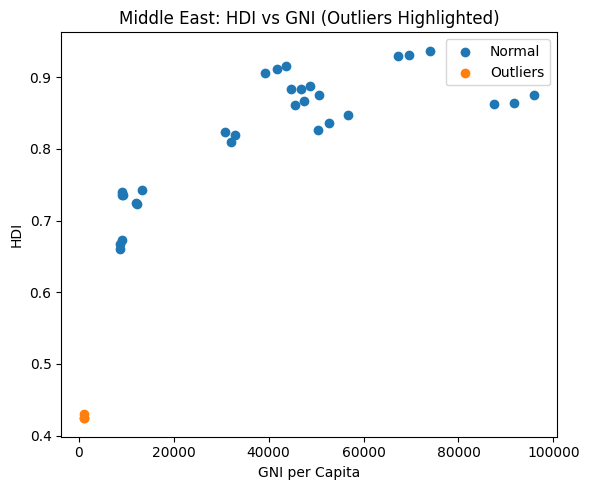

In [644]:
plt.figure(figsize=(6, 5))

# Normal points
plt.scatter(
    middle_east_df.loc[~me_hdi_outliers, "gross_inc_percap"],
    middle_east_df.loc[~me_hdi_outliers, "hdi"],
    label="Normal"
)

# Outliers
plt.scatter(
    middle_east_df.loc[me_hdi_outliers, "gross_inc_percap"],
    middle_east_df.loc[me_hdi_outliers, "hdi"],
    label="Outliers"
)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs GNI (Outliers Highlighted)")
plt.legend()
plt.tight_layout()
plt.show()


Outliers are those countries which are either leading or lagging compared to other countries in terms of development outcomes relative to their group. These countries tend to get influenced by certain elements such as conflict, oil economies, instability, and development in economic performance.
